In [6]:
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('socialmedia_cleaned.csv')

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          100000 non-null  int64  
 1   Platform            100000 non-null  object 
 2   Post ID             100000 non-null  object 
 3   Post Type           100000 non-null  object 
 4   Post Content        100000 non-null  object 
 5   Post Timestamp      100000 non-null  object 
 6   Likes               100000 non-null  int64  
 7   Comments            100000 non-null  int64  
 8   Shares              100000 non-null  int64  
 9   Impressions         100000 non-null  int64  
 10  Reach               100000 non-null  int64  
 11  Engagement Rate     100000 non-null  float64
 12  Audience Age        100000 non-null  int64  
 13  Audience Gender     100000 non-null  object 
 14  Audience Location   100000 non-null  object 
 15  Audience Interests  100000 non-null

In [7]:
#Define feature adn target

#Target
target='engaged'

features=[
    'post_length', 'has_hashtag', 'has_links',
    'post_hour', 'is_weekend',
    'Impressions', 'Reach', 'Audience Age'
]

#One=hot encoding
df_encoded = pd.get_dummies(df[['Post Type', 'Audience Gender']], drop_first=True)

#Combine the final feature matrix

X=pd.concat([df[features],df_encoded],axis=1)

y=df[target]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [9]:
#Train Logistic Regression model

model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

           0       0.50      0.46      0.48      9989
           1       0.50      0.54      0.52     10011

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

AUC Score: 0.5003136053794625


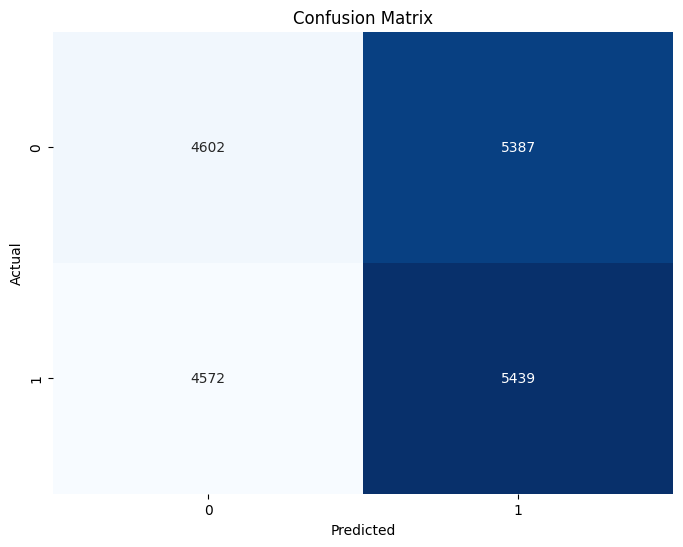

In [10]:
#Evaluate the model

y_pred=model.predict(X_test)
y_proba=model.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))

#Auc Score to check how good the model is at separating the classes

print("AUC Score:",roc_auc_score(y_test,y_proba))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()